In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as matplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
#Data relatioship
%matplotlib inline

In [3]:
#Data importing from csv
# method 1: Reading data from file path 
#SmokeData=pd.read_csv(r"C:\Users\erraj\OneDrive\Documents\Myfile\NEU\Quarter 4\Term 1\Analytics System Tech\Week 6\Assignment\Project\Smoke\bloomington-smoke-signal-analysis.csv")

# method 2: upload the file to the same directory
SmokeData=pd.read_csv("bloomington-smoke-signal-analysis.csv")
SmokeData

,id,from_addr,to_addr,bg_id,county,state_or_territory,fullname,county_id,msa_id,tract_id,state_id,bg_pop,bg_smoke_risk,bg_pop_risk,bg_fire_risk,bg_overall_risk
0,536228,1101,1199,1.810000e+11,Monroe,Indiana,W Twin Oaks Rdg,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146
1,536227,1100,1198,1.810000e+11,Monroe,Indiana,W Twin Oaks Rdg,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146
2,536226,2301,2399,1.810000e+11,Monroe,Indiana,Cutter Ct,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146
3,536225,2300,2398,1.810000e+11,Monroe,Indiana,Cutter Ct,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146
4,536224,1001,2799,1.810000e+11,Monroe,Indiana,Pinehurst Dr,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,539096,4200,4498,1.810000e+11,Monroe,Indiana,William Way,18105,14020,18105001200,18,57.0,0.172664,0.055271,0.000000,0.139236
6114,539095,7201,7499,1.810000e+11,Monroe,Indiana,Old S R 45 W,18105,14020,18105001200,18,57.0,0.172664,0.055271,0.000000,0.139236
6115,539094,7400,7498,1.810000e+11,Monroe,Indiana,Old S R 45 W,18105,14020,18105001200,18,57.0,0.172664,0.055271,0.000000,0.139236
6116,539093,6201,7299,1.810000e+11,Monroe,Indiana,W Eller Rd,18105,14020,18105001200,18,57.0,0.172664,0.055271,0.000000,0.139236


In [4]:
SmokeData.shape
#SmokeData.dtypes

(6118, 16)

In [5]:
SmokeData.dropna(how='any').shape

(6096, 16)

In [6]:
# New column to formulate the country details
SmokeData['Country']=SmokeData.shape[0]*['USA']

In [7]:
# New column to formulate the location details
#SmokeData['Location']=SmokeData.fullname.str.cat(SmokeData.county)
SmokeData['Location']=SmokeData['fullname']+", "+SmokeData['county']+", "+SmokeData['state_or_territory']+", "+ SmokeData['Country']

In [7]:
SmokeData.head()

,id,from_addr,to_addr,bg_id,county,state_or_territory,fullname,county_id,msa_id,tract_id,state_id,bg_pop,bg_smoke_risk,bg_pop_risk,bg_fire_risk,bg_overall_risk,Country,Location
0,536228,1101,1199,1.810000e+11,Monroe,Indiana,W Twin Oaks Rdg,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146,USA,"W Twin Oaks Rdg, Monroe, Indiana, USA"
1,536227,1100,1198,1.810000e+11,Monroe,Indiana,W Twin Oaks Rdg,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146,USA,"W Twin Oaks Rdg, Monroe, Indiana, USA"
2,536226,2301,2399,1.810000e+11,Monroe,Indiana,Cutter Ct,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146,USA,"Cutter Ct, Monroe, Indiana, USA"
3,536225,2300,2398,1.810000e+11,Monroe,Indiana,Cutter Ct,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146,USA,"Cutter Ct, Monroe, Indiana, USA"
4,536224,1001,2799,1.810000e+11,Monroe,Indiana,Pinehurst Dr,18105,14020,18105000402,18,243.0,0.260429,0.085626,0.142269,0.291146,USA,"Pinehurst Dr, Monroe, Indiana, USA"


In [8]:
# idnetify the null values with respect to each columns
SmokeData.isnull().sum()

id                     0
from_addr              0
to_addr                0
bg_id                  0
county                 0
state_or_territory     0
fullname               0
county_id              0
msa_id                 0
tract_id               0
state_id               0
bg_pop                22
bg_smoke_risk          0
bg_pop_risk            0
bg_fire_risk           0
bg_overall_risk        0
Country                0
Location               0
dtype: int64

In [9]:
# fill zero for NaN values in the identified column based on given condition
SmokeData_nonNA=SmokeData.fillna({
    'bg_pop':SmokeData['bg_pop'].mean()
})
SmokeData_nonNA.isnull().sum()

id                    0
from_addr             0
to_addr               0
bg_id                 0
county                0
state_or_territory    0
fullname              0
county_id             0
msa_id                0
tract_id              0
state_id              0
bg_pop                0
bg_smoke_risk         0
bg_pop_risk           0
bg_fire_risk          0
bg_overall_risk       0
Country               0
Location              0
dtype: int64

In [10]:
# Descriptive statistics 
SmokeData_nonNA.describe()

,id,bg_id,county_id,msa_id,tract_id,state_id,bg_pop,bg_smoke_risk,bg_pop_risk,bg_fire_risk,bg_overall_risk
count,6118.000000,6.118000e+03,6118.0,6118.0,6.118000e+03,6118.0,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000
mean,538578.510297,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,117.706037,0.371854,0.158058,0.185785,0.421523
std,1777.581807,0.000000e+00,0.0,0.0,3.880329e+02,0.0,65.370642,0.218523,0.071803,0.244761,0.238333
min,535490.000000,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,32.000000,0.000000,0.000000,0.000000,0.097959
25%,537032.250000,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,75.000000,0.184684,0.102747,0.005135,0.219003
50%,538588.500000,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,94.000000,0.318909,0.167164,0.085198,0.344146
75%,540117.750000,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,143.000000,0.561595,0.203552,0.280220,0.639610
max,541647.000000,1.810000e+11,18105.0,14020.0,1.810500e+10,18.0,394.000000,0.946203,0.336527,1.000000,1.000000


In [11]:
SmokeData_nonNA['bg_smoke_risk'].median()

0.31890890000000005

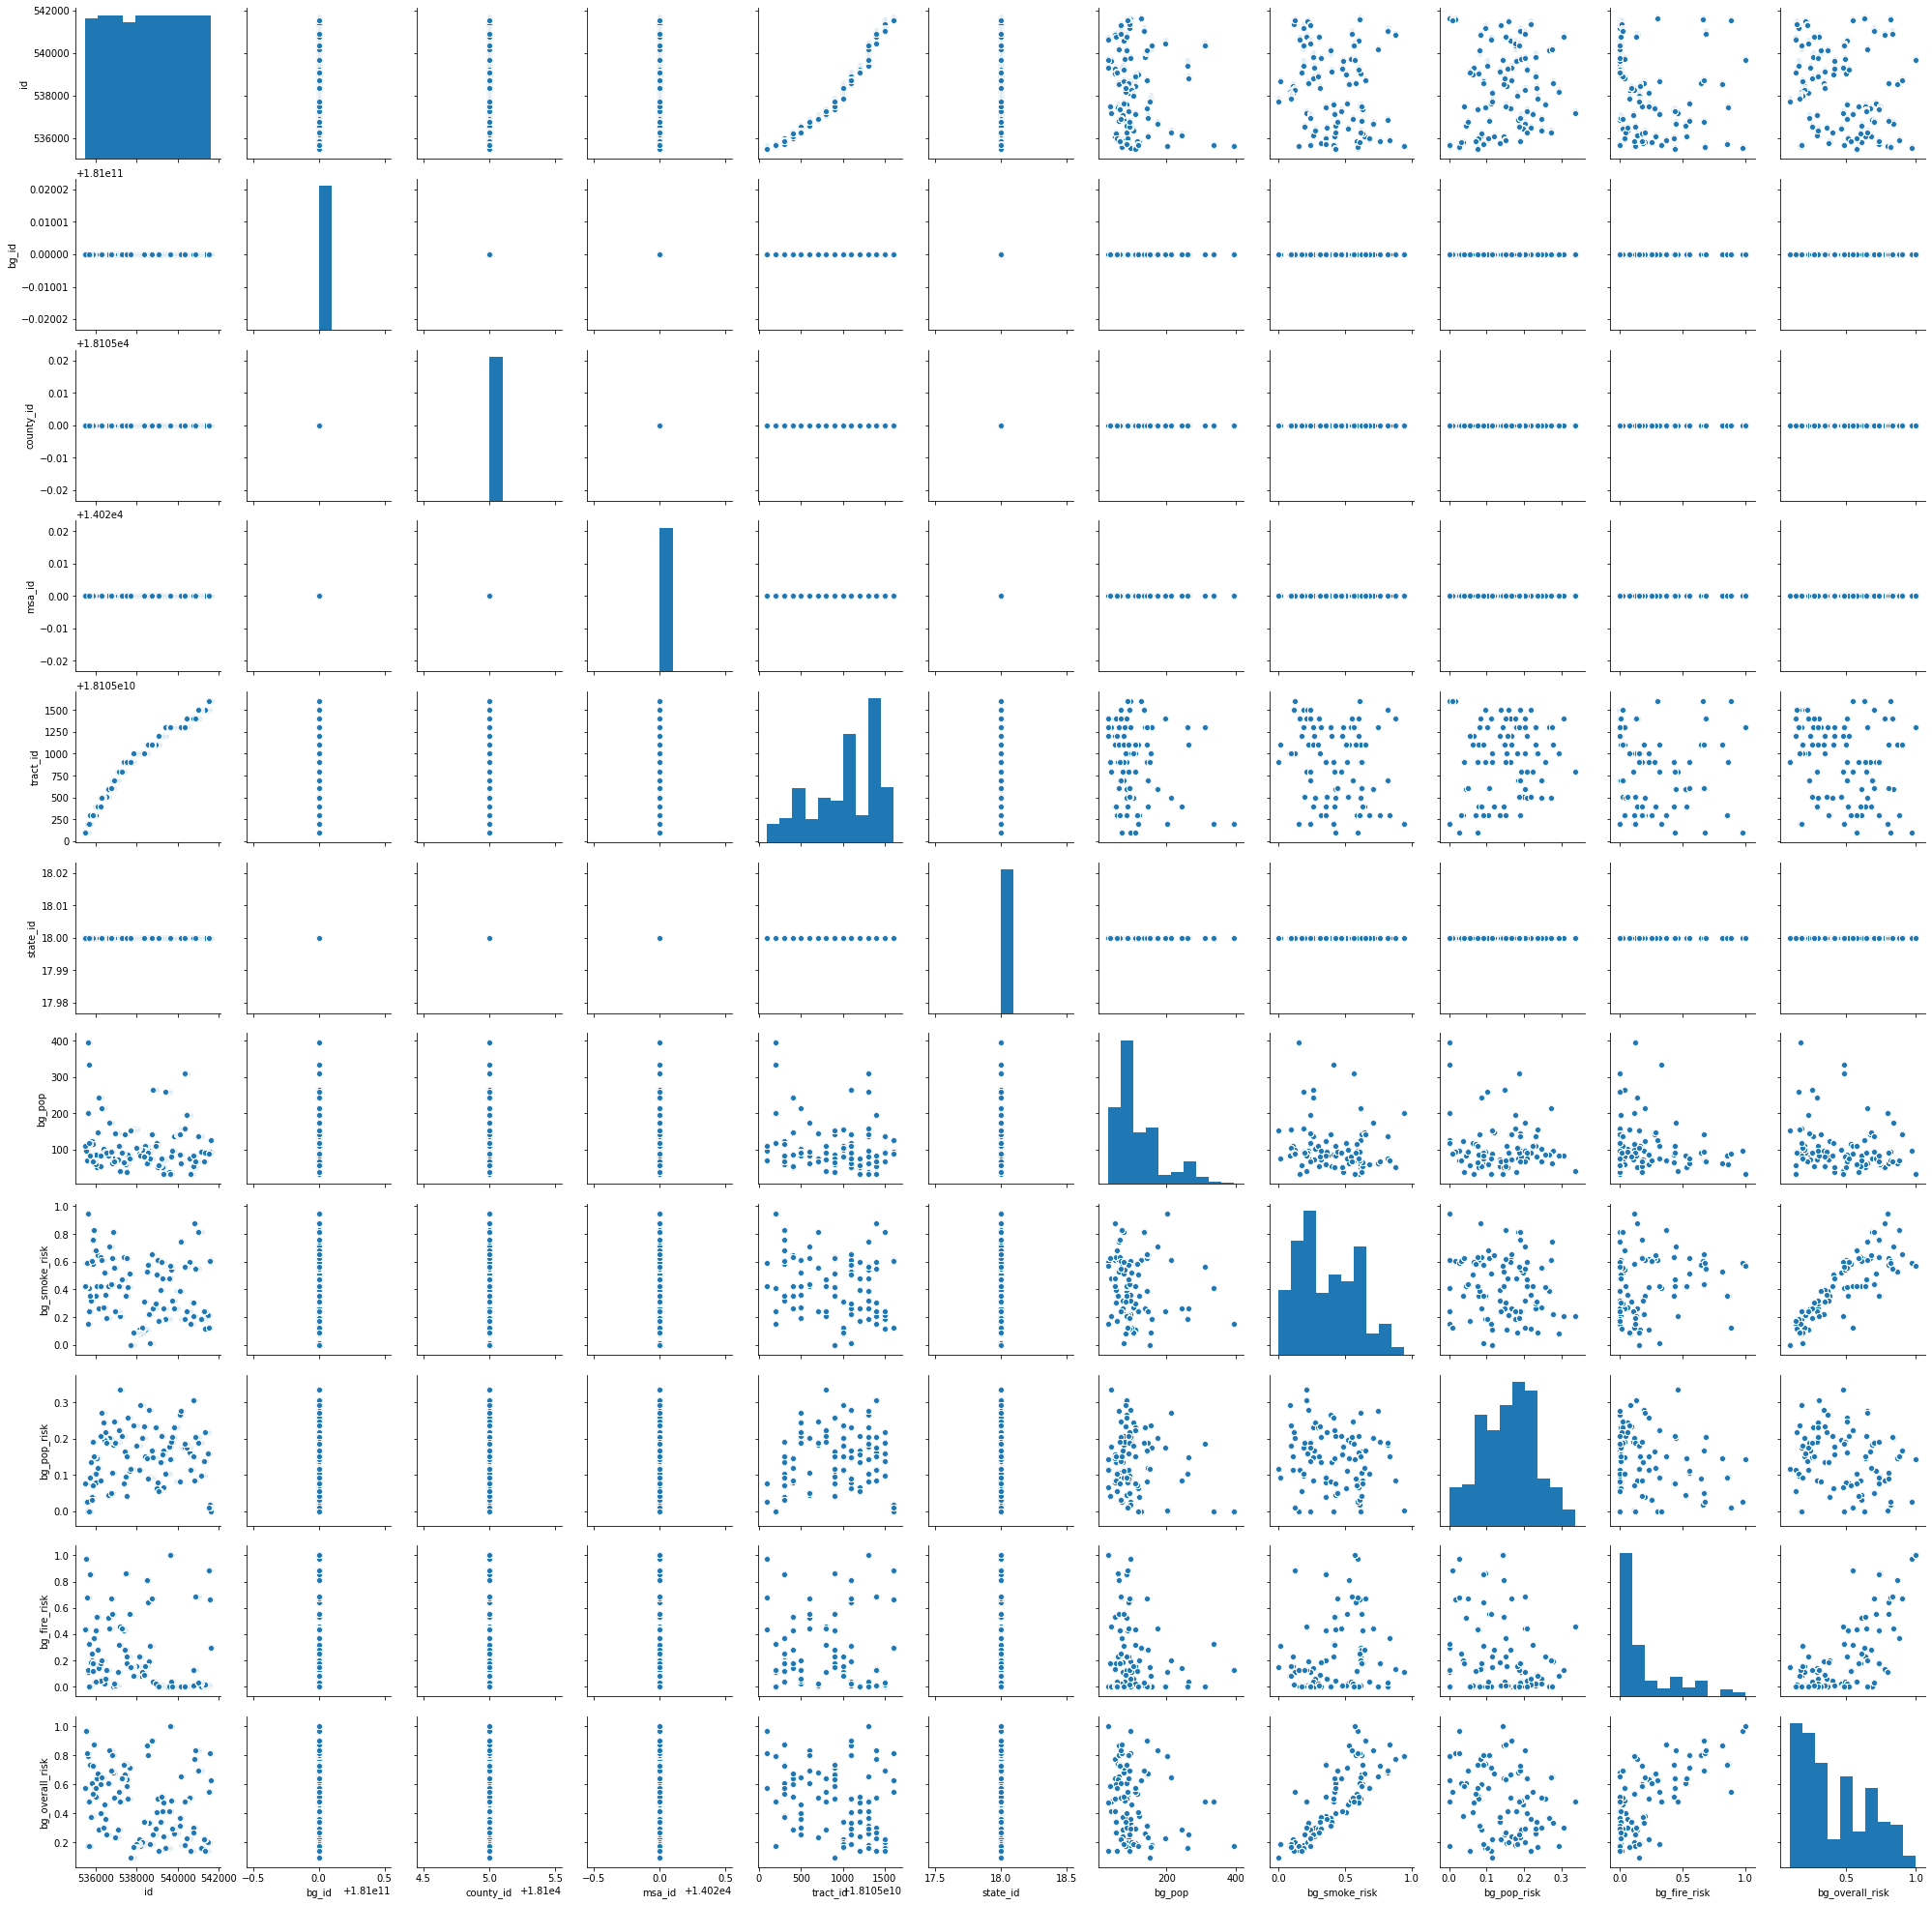

In [12]:
# seaboarn pair plot to obtain the relationship among all varibles/features
sb.pairplot(SmokeData_nonNA)

In [12]:
# Corelation score among all the features
SmokeData_nonNA.corr()

,id,bg_id,county_id,msa_id,tract_id,state_id,bg_pop,bg_smoke_risk,bg_pop_risk,bg_fire_risk,bg_overall_risk
id,1.000000,NaN,NaN,NaN,0.974554,NaN,-0.001735,-0.109580,0.112917,-0.323460,-0.243824
bg_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msa_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tract_id,0.974554,NaN,NaN,NaN,1.000000,NaN,-0.007015,-0.162736,0.165667,-0.339656,-0.286799
state_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bg_pop,-0.001735,NaN,NaN,NaN,-0.007015,NaN,1.000000,-0.130672,-0.069640,-0.243068,-0.230807
bg_smoke_risk,-0.109580,NaN,NaN,NaN,-0.162736,NaN,-0.130672,1.000000,-0.097430,0.274669,0.864904
bg_pop_risk,0.112917,NaN,NaN,NaN,0.165667,NaN,-0.069640,-0.097430,1.000000,-0.262560,-0.130449
bg_fire_risk,-0.323460,NaN,NaN,NaN,-0.339656,NaN,-0.243068,0.274669,-0.262560,1.000000,0.714304


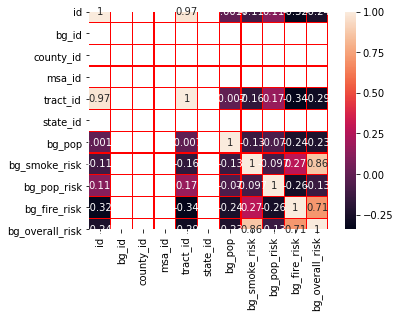

In [13]:
# Heat map to obtain the relation ship score among the features
sb.heatmap(SmokeData_nonNA.corr(), linewidth=0.2, square=True, linecolor='red', annot=True)

In [14]:
# new dataset with selected features based on correlation analysis
SmokeData_nonNA_SelectedParam=SmokeData_nonNA.loc[:,['bg_smoke_risk','bg_pop_risk','bg_fire_risk','bg_overall_risk']]

In [15]:
# Top 5 records for newly forlumated dataset
SmokeData_nonNA_SelectedParam.head()

,bg_smoke_risk,bg_pop_risk,bg_fire_risk,bg_overall_risk
0,0.260429,0.085626,0.142269,0.291146
1,0.260429,0.085626,0.142269,0.291146
2,0.260429,0.085626,0.142269,0.291146
3,0.260429,0.085626,0.142269,0.291146
4,0.260429,0.085626,0.142269,0.291146


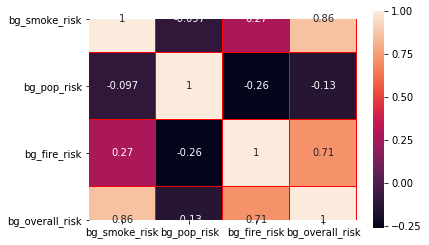

In [11]:
# Heat map for only selected fatures
sb.heatmap(SmokeData_nonNA_SelectedParam.corr(), linewidth=0.2, square=True, linecolor='red', annot=True)

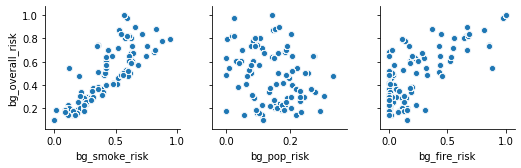

In [16]:
#Pair polt to obtain the actual relationship amomg selected features
sb.pairplot(SmokeData_nonNA, x_vars=['bg_smoke_risk','bg_pop_risk','bg_fire_risk'], y_vars='bg_overall_risk')

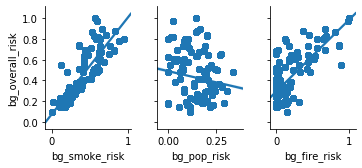

In [17]:
# Trend line with correlation plot among selected features
sb.pairplot(SmokeData_nonNA, x_vars=['bg_smoke_risk','bg_pop_risk','bg_fire_risk'], y_vars='bg_overall_risk', 
            aspect=0.7, kind='reg')

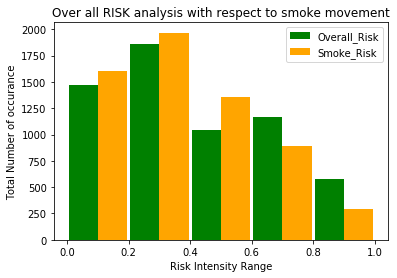

In [14]:
# histigram for somke riks(independent feature) vs over all risk (dependent feature) 
matplot.hist([SmokeData_nonNA['bg_overall_risk'],SmokeData_nonNA['bg_smoke_risk']], 
             bins=[0.0,0.2, 0.4,0.6,0.8,1.0], rwidth=0.95, 
             color=['green','orange'], label=['Overall_Risk','Smoke_Risk'])
matplot.xlabel('Risk Intensity Range')
matplot.ylabel('Total Number of occurance')
matplot.title('Over all RISK analysis with respect to smoke movement')
matplot.legend()

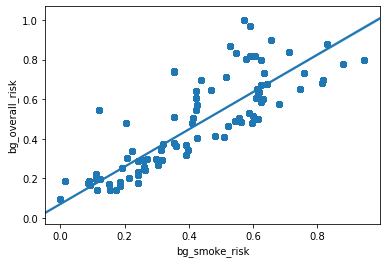

In [18]:
# Correlation pattern among smoke risk(independent feature) to over all risk (dependent feature)
sb.regplot(x='bg_smoke_risk', y='bg_overall_risk', data=SmokeData_nonNA )

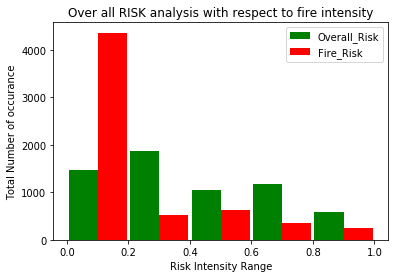

In [19]:
# histigram for Fire riks(independent feature) vs over all risk (dependent feature) 
matplot.hist([SmokeData_nonNA['bg_overall_risk'],SmokeData_nonNA['bg_fire_risk']], 
             bins=[0.0,0.2, 0.4,0.6,0.8,1.0], rwidth=0.95, 
             color=['green','Red'], label=['Overall_Risk','Fire_Risk'])
matplot.xlabel('Risk Intensity Range')
matplot.ylabel('Total Number of occurance')
matplot.title('Over all RISK analysis with respect to fire intensity')
matplot.legend()

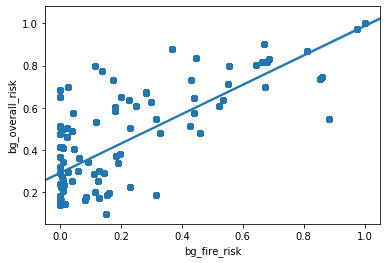

In [20]:
# Correlation pattern among FIRE risk(independent feature) to over all risk (dependent feature)
sb.regplot(x='bg_fire_risk', y='bg_overall_risk', data=SmokeData_nonNA )

In [21]:
#Create a python list for featuring columns
feature_cols=['bg_smoke_risk','bg_fire_risk']

#create a subset with only these identified columns
x=SmokeData_nonNA[feature_cols]

x.head()

,bg_smoke_risk,bg_fire_risk
0,0.260429,0.142269
1,0.260429,0.142269
2,0.260429,0.142269
3,0.260429,0.142269
4,0.260429,0.142269


In [22]:
# check the type and shape of x
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(6118, 2)


In [23]:
#Select a series of dataframe for dependent variable
y=SmokeData_nonNA['bg_overall_risk']
y.head()

0    0.291146
1    0.291146
2    0.291146
3    0.291146
4    0.291146
Name: bg_overall_risk, dtype: float64

In [24]:
# check the type and shape of Y series
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(6118,)


In [25]:
# import data spilit module from sklearn 
from sklearn.model_selection import train_test_split

In [26]:
# Train Test Split for X and Y parameters (default 25% of the data)
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=1)

In [27]:
#print the shape of each xand y component for train and test portion
print("x_train shape is ",x_train.shape)
print("x_test shape is ",x_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

x_train shape is  (4588, 2)
x_test shape is  (1530, 2)
y_train shape is  (4588,)
y_test shape is  (1530,)


#####----LINEAR Model----######

In [28]:
# Import linear model from sklearn
from sklearn import linear_model

In [29]:
#create object from imported linear model class
Linreg=linear_model.LinearRegression()

In [30]:
# fit the model with training components 
Linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#print the intercept and coefficient
print("Linear regression coefficient :",Linreg.coef_)
print("Linear regression intercept :",Linreg.intercept_)

Linear regression coefficient : [0.78886997 0.50185126]
Linear regression intercept : 0.0348667689839004


In [32]:
#Pair feature name with coefficient
zipped = list(zip(feature_cols, Linreg.coef_)) 
print(zipped)

[('bg_smoke_risk', 0.788869969896627), ('bg_fire_risk', 0.5018512607604053)]


In [33]:
#make prediction
y_pred= Linreg.predict(x_test)
print(y_pred)
print(y_pred.shape)

[0.50637585 0.28537811 0.43982037 ... 0.50904728 0.18078865 0.22434687]
(1530,)


In [37]:
# import metrics for model evaluation- RMSE and r2  
import sklearn.metrics as metrics

In [41]:
LinerRMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Linear Model=> Mean Square Error for Testing Data=",LinerRMSE)
Linear_r2=metrics.r2_score(y_test,y_pred)
print("Linear Model=> r2 value for Testing Data=",Linear_r2)

Linear Model=> Mean Square Error for Testing Data= 0.01872948941506287
Linear Model=> r2 value for Testing Data= 0.9937512728123683


In [42]:
# sample prediction by passing the two feature's value to the linear model
Linreg.predict([[0.2604294, 0.1422693]])

array([0.31170973])

#####----RIDGE Model----######

In [43]:
# Import Ridge model class from sklearn
from sklearn.linear_model import Ridge

In [44]:
# Train Ridge model
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
#print the intercept and coefficient
print("Ridge regression coefficient :", rr.coef_)
print("Linear regression intercept :", rr.intercept_)

Ridge regression coefficient : [0.78883691 0.50184137]
Linear regression intercept : 0.034880912427928956


In [46]:
# Prediction on training dataset 
pred_train_rr= rr.predict(x_train)

In [48]:
# Model evaluation on training dataset
RidgeRMSE=np.sqrt((metrics.mean_squared_error(y_train,pred_train_rr)))
print("Ridge Model=> Mean Square Error for Training Data=",RidgeRMSE)
r2_Ridge=metrics.r2_score(y_train, pred_train_rr)
print("Ridge Model=> r2 value for Training Data=",r2_Ridge)

Ridge Model=> Mean Square Error for Training Data= 0.018598043370559484
Ridge Model=> r2 value for Training Data= 0.9939325550943127


In [50]:
# model evaluation on testing dataset
pred_test_rr= rr.predict(x_test)
print("Ridge Model=> Mean Square Error for Test Data=", np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 
print("Ridge Model=> r2 value for Test Data=", metrics.r2_score(y_test, pred_test_rr))

Ridge Model=> Mean Square Error for Test Data= 0.01872953786643984
Ridge Model=> r2 value for Test Data= 0.9937512404826212


#####----LASSO Model----######

In [51]:
# Import Lasso model class from sklearn
from sklearn.linear_model import Lasso

In [52]:
# Train LASSO model
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
#print the intercept and coefficient
print("LASSO regression coefficient :",model_lasso.coef_)
print("LASSO regression intercept :",model_lasso.intercept_)

LASSO regression coefficient : [0.61741741 0.37871354]
LASSO regression intercept : 0.12179814199355071


In [54]:
# prediction on training dataset
pred_train_lasso= model_lasso.predict(x_train)

In [57]:
# Model evaluation on training data set
LASSO_RMSE=np.sqrt(metrics.mean_squared_error(y_train,pred_train_lasso))
print("Lasso Model=> Mean Square Error for Training Data=",LASSO_RMSE)
print("LASSO Model=> r2 value for Training Data=",metrics.r2_score(y_train, pred_train_lasso))

Lasso Model=> Mean Square Error for Training Data= 0.057373812294802685
LASSO Model=> r2 value for Training Data= 0.9422570795036201


In [58]:
# Model evaluation on testing dataset
pred_test_lasso= model_lasso.predict(x_test)
print("Lasso Model=> Mean Square Error for Testing Data=", np.sqrt(metrics.mean_squared_error(y_test,pred_test_lasso))) 
print("LASSO Model=> r2 value for Testing Data=",metrics.r2_score(y_test, pred_test_lasso))

Lasso Model=> Mean Square Error for Testing Data= 0.05708485679855191
LASSO Model=> r2 value for Testing Data= 0.9419527673873586


#####----ELASTIC NET----######

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
#print the intercept and coefficient
print("Elastic Net regression coefficient :",model_enet.coef_)
print("Elastic Net regression intercept :",model_enet.intercept_)

Elastic Net regression coefficient : [0.6418031  0.42070045]
Elastic Net regression intercept : 0.10480952036891988


In [63]:
pred_train_enet= model_enet.predict(x_train)
print("ELASTIC NET Model=> Mean Square Error for Training Data=",np.sqrt(metrics.mean_squared_error(y_train,pred_train_enet)))
print("ELASTIC NET Model=> r2 Value for Training Data=",metrics.r2_score(y_train, pred_train_enet))

ELASTIC NET Model=> Mean Square Error for Training Data= 0.046147584441196265
ELASTIC NET Model=> r2 Value for Training Data= 0.9626432337007576


In [64]:
pred_test_enet= model_enet.predict(x_test)
print("ELASTIC NET Model=> Mean Square Error for Testing Data=", np.sqrt(metrics.mean_squared_error(y_test,pred_test_enet)))
print("ELASTIC NET Model=> r2 Value for Testing Data=", metrics.r2_score(y_test, pred_test_enet))

ELASTIC NET Model=> Mean Square Error for Testing Data= 0.0460726657922591
ELASTIC NET Model=> r2 Value for Testing Data= 0.9621882854304586
